### 행정구역 정보 분석 및 시각화
1. pandas의 read_csv() 함수로 csv file을 읽어서 DataFrame 객체로 생성하고 데이터 확인하기
2. Data Selection : loc[] / iloc[] 를 사용해서 특정 Row와 Column 선택하기
3. 컬럼명 변경하기
4. DataFrame 객체를 Excel file로 저장하기
5. Data Grouping : groupby() 함수를 사용해서 그룹핑하기
6. 상관관계 분석 : corr() 함수를 사용해서 인구수와 면적간의 상관관계 
7. 시각화 : seaborn의 barplot() 함수를 사용해서 Plot 그리기

In [14]:
import pandas as pd
print(pd.__version__)

2.3.3


##### pandas의 read_csv() 함수로 csv file을 읽어서 DataFrame 객체로 생성하고 데이터 확인하기

In [15]:
# csv(엑셀)파일을 데이터프레임으로 불러오기
data = pd.read_csv('data/data_draw_korea.csv')
# 데이터 (행,열)
print(data.shape)
print(type(data))

(229, 8)
<class 'pandas.core.frame.DataFrame'>


In [16]:
# head() 함수: 앞쪽의 데이터 5개 불러오기
data.head()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [17]:
# tail() 함수: 뒤쪽의 데이터 5개 불러오기
data.tail()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시
228,228,198077,충주,6,10,983.70,충청북도,충주시


In [18]:
# sample() 함수: 전체 데이터 중에서 내가 원하는 개수만큼 무작위로 데이터를 추출
data.sample()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
41,41,149080,의왕,6,8,54.0,경기도,의왕시


In [19]:
# 컬럼명 확인하기
print(f'컬럼명 = {data.columns}')

# 인덱스 확인하기
print(f'인덱스 = {data.index}')

컬럼명 = Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')
인덱스 = RangeIndex(start=0, stop=229, step=1)


In [20]:
# 타입을 확인하기
print(type(data.values))
# 데이터프레임에 저장된 모든 값을 행렬 형태로 보여주기
data.values

<class 'numpy.ndarray'>


array([[0, 202520, '강릉', ..., 1040.07, '강원도', '강릉시'],
       [1, 25589, '고성(강원)', ..., 664.19, '강원도', '고성군'],
       [2, 86747, '동해', ..., 180.01, '강원도', '동해시'],
       ...,
       [226, 62809, '진천', ..., 406.08, '충청북도', '진천군'],
       [227, 790216, '청주', ..., 932.51, '충청북도', '청주시'],
       [228, 198077, '충주', ..., 983.7, '충청북도', '충주시']],
      shape=(229, 8), dtype=object)

In [21]:
# info() 함수
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [22]:
# 모든 컬럼의 타입 확인
data.dtypes

Unnamed: 0      int64
인구수             int64
shortName      object
x               int64
y               int64
면적            float64
광역시도           object
행정구역           object
dtype: object

In [23]:
# 면적 컬럼의 타입을 확인
print(type(data['면적']))
data['면적'].dtype

<class 'pandas.core.series.Series'>


dtype('float64')

In [24]:
# 특정컬럼(인구수)의 타입 확인
print(type(data['인구수']))
data['인구수'].dtype

<class 'pandas.core.series.Series'>


dtype('int64')

In [25]:
# describe() 함수: 숫자 타입인 컬럼의 통계함수 출력
data.describe()

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [26]:
# numpy np.number 속성을 사용해서 describe()
import numpy as np
# 반드시 숫자 데이터만 찾아서 출력 (숫자가 없으면 에러 남)
data.describe(include=np.number)

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [27]:
# describe() 함수, 문자열(object) 타입인 컬럼의 통계함수 출력
data.describe(include=[object])

,shortName,광역시도,행정구역
count,229,229,229
unique,229,17,206
top,강릉,경기도,동구
freq,1,31,6


In [28]:
# data['행정구역'] == '동구' 
data['행정구역'] == '동구' 

0      False
1      False
2      False
3      False
4      False
       ...  
224    False
225    False
226    False
227    False
228    False
Name: 행정구역, Length: 229, dtype: bool

In [29]:
# 해당 조건식과 매칭되는 Row data 선택하기
# .loc()함수: 이름을 기준으로 행과 열을 선택
data.loc[data['행정구역'] == '동구']

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
92,92,97571,광주동구,3,20,48.86,광주광역시,동구
98,98,330830,대구동구,11,13,182.35,대구광역시,동구
104,104,236524,대전동구,5,13,136.80,대전광역시,동구
112,112,85952,부산동구,10,17,9.77,부산광역시,동구
151,151,164738,울산동구,12,14,35.77,울산광역시,동구
159,159,68950,인천동구,1,5,7.05,인천광역시,동구


In [30]:
# '광역시도' == '경기도'
# .reset_index(): 현재 설정된 인덱스(행 이름)를 버리고, 다시 0부터 시작하는 숫자 번호표(0, 1, 2...)로 초기화
data.loc[data['광역시도'] == '경기도'].reset_index()

,index,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,18,18,53497,가평,9,3,843.040,경기도,가평군
1,19,19,955384,고양,4,2,267.330,경기도,고양시
2,20,20,63227,과천,7,7,35.813,경기도,과천시
3,21,21,327111,광명,3,3,38.500,경기도,광명시
4,22,22,290210,광주,8,7,431.840,경기도,광주시
5,23,23,175676,구리,9,4,33.300,경기도,구리시
6,24,24,273302,군포,5,8,36.350,경기도,군포시
7,25,25,326523,김포,2,3,276.640,경기도,김포시
8,26,26,610300,남양주,8,3,458.440,경기도,남양주시
9,27,27,90398,동두천,7,2,95.680,경기도,동두천시


In [31]:
# '광역시도' == '경기도'
data.loc[data['광역시도'] == '경기도'].reset_index(drop=True)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,18,53497,가평,9,3,843.040,경기도,가평군
1,19,955384,고양,4,2,267.330,경기도,고양시
2,20,63227,과천,7,7,35.813,경기도,과천시
3,21,327111,광명,3,3,38.500,경기도,광명시
4,22,290210,광주,8,7,431.840,경기도,광주시
5,23,175676,구리,9,4,33.300,경기도,구리시
6,24,273302,군포,5,8,36.350,경기도,군포시
7,25,326523,김포,2,3,276.640,경기도,김포시
8,26,610300,남양주,8,3,458.440,경기도,남양주시
9,27,90398,동두천,7,2,95.680,경기도,동두천시


In [32]:
# describe() 함수, 모든 컬럼의 통계함수 출력
data.describe(include='all')

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
count,229.000000,2.290000e+02,229,229.000000,229.000000,229.000000,229,229
unique,NaN,NaN,229,NaN,NaN,NaN,17,206
top,NaN,NaN,강릉,NaN,NaN,NaN,경기도,동구
freq,NaN,NaN,1,NaN,NaN,NaN,31,6
mean,114.000000,2.110898e+05,NaN,6.117904,11.262009,435.419795,NaN,NaN
std,66.250786,2.074378e+05,NaN,3.320469,6.040898,381.612549,NaN,NaN
min,0.000000,8.392000e+03,NaN,0.000000,0.000000,2.800000,NaN,NaN
25%,57.000000,4.955900e+04,NaN,3.000000,6.000000,54.000000,NaN,NaN
50%,114.000000,1.401590e+05,NaN,6.000000,11.000000,436.400000,NaN,NaN
75%,171.000000,3.216180e+05,NaN,9.000000,16.000000,692.800000,NaN,NaN


### Data Selection
* loc[] 또는 iloc[]
* loc[Row 선택, Column 선택]

In [33]:
# 인구수 1개의 컬럼 선택
# 좀 더 많이 사용하는 방식
data['인구수']

0      202520
1       25589
2       86747
3       63986
4       76733
        ...  
224    127462
225     34480
226     62809
227    790216
228    198077
Name: 인구수, Length: 229, dtype: int64

In [34]:
# 인구수 1개의 컬럼 선택
data.loc[:,'인구수']

0      202520
1       25589
2       86747
3       63986
4       76733
        ...  
224    127462
225     34480
226     62809
227    790216
228    198077
Name: 인구수, Length: 229, dtype: int64

In [35]:
# ['행정구역','인구수','면적'] 컬럼의 데이터 출력
data[['행정구역','인구수','면적']]
# data.loc[:,['행정구역','인구수','면적']]

,행정구역,인구수,면적
0,강릉시,202520,1040.07
1,고성군,25589,664.19
2,동해시,86747,180.01
3,삼척시,63986,1185.80
4,속초시,76733,105.25
...,...,...,...
224,제천시,127462,882.47
225,증평군,34480,81.84
226,진천군,62809,406.08
227,청주시,790216,932.51


In [36]:
# 인구수 컬럼의 집계함수
print(f"인구수 최대값 {data['인구수'].max():,}")
print(f"인구수 최소값 {data['인구수'].min():,}")
# round: 반올림
print(f"인구수 평균 {round(data['인구수'].mean()):,}")
print(f"인구수 표준편차 {round(data['인구수'].std()):,}")
print(f"인구수 중간값 {data['인구수'].median():,}")
data['인구수'].quantile([0.25, 0.75])

인구수 최대값 1,125,461
인구수 최소값 8,392
인구수 평균 211,090
인구수 표준편차 207,438
인구수 중간값 140,159.0


0.25     49559.0
0.75    321618.0
Name: 인구수, dtype: float64

In [37]:
# 인구수가 가장 많은 행정구역?
# 인구수의 최대값을 max_popu 변수에 저장
max_popu = data['인구수'].max()
print(max_popu)

#data['인구수'] == max_popu
data.loc[data['인구수'] == max_popu]

1125461


,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
30,30,1125461,수원,6,9,121.09,경기도,수원시


In [38]:
# 면적이 넓은 행정구역?
data.loc[data['면적'] == data['면적'].max()]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
15,15,62957,홍천,10,4,1817.94,강원도,홍천군


In [39]:
# 인구수가 가장 적은 행정구역?
data.loc[data['인구수'] == data['인구수'].min()]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
83,83,8392,울릉,13,6,72.82,경상북도,울릉군


In [40]:
# unique한 광역시도명
# .unique(): 중복된 값을 제거하고 고유한 값들만 추출
data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [41]:
# 광역시도별 Row Counting
# .value_counts(): 데이터프레임의 특정 열(Column)에 들어있는 고유값들의 개수를 각각 세어서 내림차순으로 정렬해주는 함수
data['광역시도'].value_counts()

광역시도
경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
광주광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: count, dtype: int64

In [42]:
# data['광역시도'] == '경기도'의 ['행정구역','인구수','면적'] 컬럼의 데이터 출력하기
# 인구수가 많은 순서대로 정렬
# 인덱스 재설정
data.loc[data['광역시도'] == '경기도', ['행정구역','인구수','면적']].sort_values(by='인구수', ascending=False).reset_index(drop=True)

,행정구역,인구수,면적
0,수원시,1125461,121.090
1,고양시,955384,267.330
2,용인시,915005,591.500
3,성남시,911628,141.820
4,부천시,805473,53.440
5,안산시,668089,144.780
6,남양주시,610300,458.440
7,안양시,566558,58.520
8,화성시,555129,688.100
9,평택시,423763,452.310


In [43]:
#경기도에 속한 행정구역명, 인구수, 면적 선택하기 인구수를 descending 순서대로 출력하고 index reset 하여 gy_df 라는 변수에 저장하기
#data.loc[row , col]
gy_df = data.loc[data['광역시도'] == '경기도', ['행정구역','인구수','면적']].sort_values(by='인구수', ascending=False).reset_index(drop=True)
gy_df

,행정구역,인구수,면적
0,수원시,1125461,121.090
1,고양시,955384,267.330
2,용인시,915005,591.500
3,성남시,911628,141.820
4,부천시,805473,53.440
5,안산시,668089,144.780
6,남양주시,610300,458.440
7,안양시,566558,58.520
8,화성시,555129,688.100
9,평택시,423763,452.310


In [44]:
# 인구수2 라는 새로운 컬럼을 생성
gy_df['인구수2'] = gy_df['인구수'].map(lambda val:f'{val:,}')

In [45]:
gy_df[['인구수','인구수2']].head()

,인구수,인구수2
0,1125461,"1,125,461"
1,955384,"955,384"
2,915005,"915,005"
3,911628,"911,628"
4,805473,"805,473"


In [46]:
# 면적2 라는 새로운 컬럼을 생성
gy_df['면적2'] = gy_df['면적'].map(lambda val:f'{val:.2f}')
gy_df[['면적','면적2']]

,면적,면적2
0,121.090,121.09
1,267.330,267.33
2,591.500,591.50
3,141.820,141.82
4,53.440,53.44
5,144.780,144.78
6,458.440,458.44
7,58.520,58.52
8,688.100,688.10
9,452.310,452.31


In [47]:
# 면적이 > 1000 큰 조건과 매핑되는 새로운 DataFrame 생성 area_1000 라는 변수에 저장하기
# 컬럼명은 ['행정구역','인구수','면적']
# .copy(): 복사본 만들기
area_1000 = data.loc[data['면적'] > 1000].copy()
area_1000.head()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
7,7,34966,영월,10,8,1127.36,강원도,영월군
9,9,29260,인제,9,2,1646.08,강원도,인제군
10,10,34242,정선,11,6,1220.67,강원도,정선군


In [48]:
# area_1000 DataFrame 객체에 면적2 컬럼을 생성 (3자리 단위로, 콤마가 표시된 값으로)
# 전체 Row에 적용됨
area_1000.loc[:, '면적2'] = area_1000['면적'].map('{:,}'.format)
area_1000[['면적','면적2']]

,면적,면적2
0,1040.07,"1,040.07"
3,1185.80,"1,185.8"
7,1127.36,"1,127.36"
9,1646.08,"1,646.08"
10,1220.67,"1,220.67"
12,1116.35,"1,116.35"
14,1463.65,"1,463.65"
15,1817.94,"1,817.94"
68,1323.85,"1,323.85"
72,1009.56,"1,009.56"


In [49]:
# 장점: 조건식을 줄 수가 있음
area_1000.loc[:,['면적','면적2']].sort_values(by='면적',ascending=False)

,면적,면적2
15,1817.94,"1,817.94"
9,1646.08,"1,646.08"
77,1519.00,"1,519.0"
14,1463.65,"1,463.65"
68,1323.85,"1,323.85"
75,1254.82,"1,254.82"
10,1220.67,"1,220.67"
74,1201.00,"1,201.0"
3,1185.80,"1,185.8"
85,1175.89,"1,175.89"


In [50]:
# 면적 컬럼의 값이 1500인 Row에만 면적3 이라는 새로운 컬럼의 값이 채워짐
# 조건에 해당하지 않는 Row에는 NaN 값으로 채워짐
area_1000.loc[area_1000['면적'] >= 1500,'면적3'] = area_1000['면적'].map('{:,}'.format)

In [51]:
area_1000.loc[:,['면적','면적2','면적3']].sort_values(by='면적',ascending=False)

,면적,면적2,면적3
15,1817.94,"1,817.94","1,817.94"
9,1646.08,"1,646.08","1,646.08"
77,1519.00,"1,519.0","1,519.0"
14,1463.65,"1,463.65",NaN
68,1323.85,"1,323.85",NaN
75,1254.82,"1,254.82",NaN
10,1220.67,"1,220.67",NaN
74,1201.00,"1,201.0",NaN
3,1185.80,"1,185.8",NaN
85,1175.89,"1,175.89",NaN


In [52]:
#경기도 인구수의 평균과 표준편차
print(f"경기도 인구수 평균 = {gy_df['인구수'].mean()}")
print(f"경기도 인구수 편차 = {gy_df['인구수'].std()}")

경기도 인구수 평균 = 378845.48387096776
경기도 인구수 편차 = 304548.39514203876


In [53]:
#광역시도명을 인자로 받아서 해당 광역시에 속한 행정구역들의 인구수의 평균과 편차 구하기
def pop_mean_std(df, sido_name):
    print(f'==> {sido_name} 인구수의 평균과 편차 <==')
    sido_df = df.loc[df['광역시도'] == sido_name, '인구수':'행정구역'].copy()
    print(f"{sido_name} 인구수 평균 = {sido_df['인구수'].mean()}")
    print(f"{sido_name} 인구수 편차 = {sido_df['인구수'].std()}")

In [54]:
pop_mean_std(data, '서울특별시')

==> 서울특별시 인구수의 평균과 편차 <==
서울특별시 인구수 평균 = 375792.28
서울특별시 인구수 편차 = 125231.24797500289


In [55]:
# Unique한 광역시도명 순회하면서  광역시도명을 출력합니다. 
for sido_name in data['광역시도'].unique():
    pop_mean_std(data, sido_name)

==> 강원도 인구수의 평균과 편차 <==
강원도 인구수 평균 = 79413.22222222222
강원도 인구수 편차 = 87316.38323837094
==> 경기도 인구수의 평균과 편차 <==
경기도 인구수 평균 = 378845.48387096776
경기도 인구수 편차 = 304548.39514203876
==> 경상남도 인구수의 평균과 편차 <==
경상남도 인구수 평균 = 174693.72222222222
경상남도 인구수 편차 = 245796.4650767224
==> 경상북도 인구수의 평균과 편차 <==
경상북도 인구수 평균 = 109085.39130434782
경상북도 인구수 편차 = 124954.74088490057
==> 광주광역시 인구수의 평균과 편차 <==
광주광역시 인구수 평균 = 287641.8
광주광역시 인구수 편차 = 137076.68320578814
==> 대구광역시 인구수의 평균과 편차 <==
대구광역시 인구수 평균 = 297306.25
대구광역시 인구수 편차 = 174375.39437968715
==> 대전광역시 인구수의 평균과 편차 <==
대전광역시 인구수 평균 = 293535.4
대전광역시 인구수 편차 = 111853.57188217103
==> 부산광역시 인구수의 평균과 편차 <==
부산광역시 인구수 평균 = 207724.4375
부산광역시 인구수 편차 = 106246.04138380481
==> 서울특별시 인구수의 평균과 편차 <==
서울특별시 인구수 평균 = 375792.28
서울특별시 인구수 편차 = 125231.24797500289
==> 세종특별자치시 인구수의 평균과 편차 <==
세종특별자치시 인구수 평균 = 191233.0
세종특별자치시 인구수 편차 = nan
==> 울산광역시 인구수의 평균과 편차 <==
울산광역시 인구수 평균 = 221117.0
울산광역시 인구수 편차 = 64163.28658196991
==> 인천광역시 인구수의 평균과 편차 <==
인천광역시 인구수 평균 = 276657.5
인천광역시 인구수 편차

In [56]:
#loc[] 사용
#인덱스가 20부터 25까지
data.loc[20:25]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시
25,25,326523,김포,2,3,276.640,경기도,김포시


In [57]:
#iloc[] 사용
#인덱스가 20부터 24까지
data.iloc[20:25]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시


In [58]:
# 데이터에서 컬럼 알아보기
data.columns

Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [59]:
#iloc[row index, column index] 사용 
#인덱스가 20 부터 25까지, 컬럼이 인구수부터 행정구역 까지
data.iloc[20:25, 1:8]

,인구수,shortName,x,y,면적,광역시도,행정구역
20,63227,과천,7,7,35.813,경기도,과천시
21,327111,광명,3,3,38.500,경기도,광명시
22,290210,광주,8,7,431.840,경기도,광주시
23,175676,구리,9,4,33.300,경기도,구리시
24,273302,군포,5,8,36.350,경기도,군포시


In [60]:
#loc[] 사용
#index가 40,55,60 이고, column이 인구수,광역시도,행정구역
data.loc[[40,55,60],['인구수','광역시도','행정구역']]

,인구수,광역시도,행정구역
40,915005,경기도,용인시
55,106388,경상남도,사천시
60,56734,경상남도,창녕군


In [61]:
#인덱스가 0인 행 하나만 선택
print(type(data.loc[0]))
data.loc[0]

<class 'pandas.core.series.Series'>


Unnamed: 0          0
인구수            202520
shortName          강릉
x                  11
y                   4
면적            1040.07
광역시도              강원도
행정구역              강릉시
Name: 0, dtype: object

In [62]:
#열 하나만 선택
print(type(data['행정구역']))
data['행정구역'].head()

<class 'pandas.core.series.Series'>


0    강릉시
1    고성군
2    동해시
3    삼척시
4    속초시
Name: 행정구역, dtype: object

### 컬럼명 변경하기, 컬럼을 인덱스 전환하기
* rename() 함수
* inPlace=False (default) 원본 DataFrame객체를 변경하지 않고, 변경한 결과만 출력한다.
* inPlace=True 원본 DataFrame객체를 변경하고, 변경한 결과는 출력하지 않는다.

In [63]:
data.columns

Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [64]:
# 'Unnamed: 0' 컬럼명을 'seq' 로 변경
# 원본 객체는 변경되지 않고 변경된 결과만 출력함
# inplace=True를 하면 원본 객체가 변경됨
data.rename(columns={'Unnamed: 0':'seq'}, inplace=False)


,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...,...
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시


In [65]:
#원본 객체가 변경되고 변경된 결과는 출력하지 않는다.
data.columns

Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [66]:
# seq 컬럼을 인덱스로 변경한다 set_index() 함수 사용
# inplace 속성이 동일하게 적용됨
data.set_index('seq', inplace=True)

KeyError: "None of ['seq'] are in the columns"

In [ ]:
data.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


### DataFrame을 Excel file로 저장하기
* 인구수가 평균보다 작은 행정구역, 광역시도, 인구수를 선택해서 DataFrame생성하기
* DataFrame의 to_excel() 함수 사용

In [ ]:
# 인구수의 평균값 구하기
pop_mean_value=data['인구수'].mean()
print(pop_mean_value)
print(round(pop_mean_value))
print(f'{pop_mean_value:.2f}')

211089.77729257641
211090
211089.78


In [ ]:
# 인구수의 평균값보다 작은 Row를 선택하고, '광역시도','행정구역','인구수' 컬럼값을 가져오기
# 정렬할때 광역시도는 ascending으로 , 인구수는 descending
pop_mean_lt_df = data.loc[data['인구수'] < pop_mean_value, ['광역시도','행정구역','인구수']].sort_values(by=['광역시도','인구수'], ascending=[True, False]).reset_index(drop=True)
print(pop_mean_lt_df.shape)

(141, 3)


In [ ]:
# DataFrame의 to_excel() 함수를 사용하여 excel 파일로 저장
pop_mean_lt_df.to_excel('data/평균인구수미만행정구역.xlsx')

### GroupBy 기능 사용하기
* 광역시도별 행정구역의 인구수 합계
* ~별에 해당하는 컬럼명이나 컬럼값을 groupby() 함수의 인자로 전달한다.
* Series 객체의 groupby(data['광역시도']) 함수는 컬럼의 값을 인자로 전달하고
* DataFrame 객체의 groupby('광역시도') 함수는 컬럼명을 인자로 전달합니다.

In [ ]:
# Series 객체 사용 - 광역시도별 인구수의 합계 
# SeriesGroupBy object
data['인구수'].groupby(data['광역시도']).sum()

광역시도
강원도         1429438
경기도        11744210
경상남도        3144487
경상북도        2508964
광주광역시       1438209
대구광역시       2378450
대전광역시       1467677
부산광역시       3323591
서울특별시       9394807
세종특별자치시      191233
울산광역시       1105585
인천광역시       2766575
전라남도        1700563
전라북도        1739048
제주특별자치도      575873
충청남도        1946129
충청북도        1484720
Name: 인구수, dtype: int64

In [ ]:
# DataFrame 객체 사용 - 광역시도별 인구수의 합계 
# DataFrameGroupBy object
data.groupby('광역시도').sum(numeric_only=True)

,인구수,x,y,면적
광역시도,,,,
강원도,1429438,173,68,16874.810
경기도,11744210,182,162,10179.743
경상남도,3144487,123,313,10437.460
경상북도,2508964,229,240,19021.850
광주광역시,1438209,12,99,501.280
대구광역시,2378450,74,111,885.690
대전광역시,1467677,23,66,539.640
부산광역시,3323591,162,276,763.240
서울특별시,9394807,142,111,605.390


In [ ]:
# DataFrameGroupBy 
data.groupby('광역시도')['인구수'].sum()

광역시도
강원도         1429438
경기도        11744210
경상남도        3144487
경상북도        2508964
광주광역시       1438209
대구광역시       2378450
대전광역시       1467677
부산광역시       3323591
서울특별시       9394807
세종특별자치시      191233
울산광역시       1105585
인천광역시       2766575
전라남도        1700563
전라북도        1739048
제주특별자치도      575873
충청남도        1946129
충청북도        1484720
Name: 인구수, dtype: int64

In [ ]:
# 광역시도별 행정구역별 인구수의 합계
data.groupby(['광역시도','행정구역']).sum(numeric_only=True)

인구수   x   y       면적
광역시도 행정구역                         
강원도  강릉시   202520  11   4  1040.07
     고성군    25589   9   0   664.19
     동해시    86747  11   5   180.01
     삼척시    63986  11   8  1185.80
     속초시    76733   9   1   105.25
...           ...  ..  ..      ...
충청북도 제천시   127462   8  10   882.47
     증평군    34480   6  11    81.84
     진천군    62809   5  11   406.08
     청주시   790216   6  12   932.51
     충주시   198077   6  10   983.70

[229 rows x 4 columns]

In [ ]:
# data/광역시도별행정구역별인구수의합계.xlsx 파일로 저장하기
group_df = data.groupby(['광역시도','행정구역'])['인구수'].sum()
group_df.to_excel('data/광역시도별행정구역별인구수합계.xlsx',sheet_name='인구수합계')

### 엑셀 수치 데이터에 콤마찍기
[pandas.ExcelWriter](https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html)

In [ ]:
%pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('data/광역시도별인구수의합계1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
group_df.to_excel(writer, sheet_name='인구수합계')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['인구수합계']

# Set a currency number format for a column.
num_format = workbook.add_format({'num_format': '#,###'})
worksheet.set_column('C:C', None, num_format)

# Close the Pandas Excel writer and output the Excel file.
writer.close() #_save()

#### 상관계수 (Correlation Coefficient)
* 인구수와 면적 데이터간에 관련성이 있는지 살펴보기 위해서 상관계수 구하기
* 상관계수 값은 -1 ~ 1 사이의 값이며, 0에 가까울 수록 관련성이 낮고, 1에 가까울 수록 관련성이 높다. 
* 음수는 반비례 (면적이 넓은 반면 인구수는 적은 경우), 양수는 비례 (면적이 넓고, 인구수도 높은 경우)
* corr() 함수

In [ ]:
#전국의 면적과 인구수의 상관계수 구하기
data['면적'].corr(data['인구수'])

np.float64(-0.3460351605045768)

In [ ]:
#서울의 면적과 인구수의 상관계수 구하기
seoul_df = data.loc[data['광역시도'] == '서울특별시',['행정구역','인구수','면적']]
seoul_df['면적'].corr(seoul_df['인구수'])

np.float64(0.6644268188909778)

In [ ]:
#경기도의 면적과 인구수의 상관계수 구하기
gy_df['면적'].corr(gy_df['인구수'])

np.float64(-0.21572485071590813)

In [ ]:
for sido_name in data['광역시도'].unique():
    print(f'{sido_name}의 인구수와 면적간의 상관계수')
    sido_df = data.loc[data['광역시도'] == sido_name,['행정구역','인구수','면적']]
    print(sido_df['면적'].corr(sido_df['인구수']))

강원도의 인구수와 면적간의 상관계수
-0.003424870292108486
경기도의 인구수와 면적간의 상관계수
-0.21572485071590813
경상남도의 인구수와 면적간의 상관계수
0.029951565364477125
경상북도의 인구수와 면적간의 상관계수
0.20592950800967932
광주광역시의 인구수와 면적간의 상관계수
0.6769289677125123
대구광역시의 인구수와 면적간의 상관계수
-0.057946386652948614
대전광역시의 인구수와 면적간의 상관계수
0.1997155244648549
부산광역시의 인구수와 면적간의 상관계수
-0.13823708369604065
서울특별시의 인구수와 면적간의 상관계수
0.6644268188909778
세종특별자치시의 인구수와 면적간의 상관계수
nan
울산광역시의 인구수와 면적간의 상관계수
-0.13435717195061844
인천광역시의 인구수와 면적간의 상관계수
-0.4571430756049645
전라남도의 인구수와 면적간의 상관계수
-0.05786859599072531
전라북도의 인구수와 면적간의 상관계수
-0.695805033826725
제주특별자치도의 인구수와 면적간의 상관계수
1.0
충청남도의 인구수와 면적간의 상관계수
0.2729636767632082
충청북도의 인구수와 면적간의 상관계수
0.4110669104748176


c:\Users\user\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3057: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\user\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\user\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


#### Groupby 한 DataFrame에 집계함수를 여러개 설정하기
* agg() 함수
* agg(['max','mean','std'])

In [ ]:
# agg() 함수 사용하여 여러개의 통계함수를 사용합니다. 
# fillna(0) NaN 을 0 으로 변경해 줌
data.groupby('광역시도')['인구수'].agg(['max','mean','std']).fillna(0)

,max,mean,std
광역시도,,,
강원도,313851,79413.222222,87316.383238
경기도,1125461,378845.483871,304548.395142
경상남도,1010040,174693.722222,245796.465077
경상북도,488395,109085.391304,124954.740885
광주광역시,439683,287641.800000,137076.683206
대구광역시,584517,297306.250000,174375.394380
대전광역시,475094,293535.400000,111853.571882
부산광역시,397134,207724.437500,106246.041384
서울특별시,615487,375792.280000,125231.247975


In [ ]:
# agg() 함수 사용 - 그룹핑한 데이터를 여러개의 집계함수를 사용해서 새로운 DataFrame 객체 생성하기
group_agg_df = data.groupby('광역시도')['인구수'].agg(['max','mean','std']).fillna(0)
group_agg_df

,max,mean,std
광역시도,,,
강원도,313851,79413.222222,87316.383238
경기도,1125461,378845.483871,304548.395142
경상남도,1010040,174693.722222,245796.465077
경상북도,488395,109085.391304,124954.740885
광주광역시,439683,287641.800000,137076.683206
대구광역시,584517,297306.250000,174375.394380
대전광역시,475094,293535.400000,111853.571882
부산광역시,397134,207724.437500,106246.041384
서울특별시,615487,375792.280000,125231.247975


In [ ]:
# DataFrame의 style.format() 함수 사용하기
group_agg_df.style.format('{0:.2f}')

,max,mean,std
광역시도,,,
강원도,313851.00,79413.22,87316.38
경기도,1125461.00,378845.48,304548.40
경상남도,1010040.00,174693.72,245796.47
경상북도,488395.00,109085.39,124954.74
광주광역시,439683.00,287641.80,137076.68
대구광역시,584517.00,297306.25,174375.39
대전광역시,475094.00,293535.40,111853.57
부산광역시,397134.00,207724.44,106246.04
서울특별시,615487.00,375792.28,125231.25


In [ ]:
# 컬럼의 값을 변경하기 map() 함수를 사용하여 포맷하기
group_agg_df['mean'] = group_agg_df['mean'].map('{:.2f}'.format)
group_agg_df['std'] = group_agg_df['std'].map('{:.2f}'.format)
group_agg_df

,max,mean,std
광역시도,,,
강원도,313851,79413.22,87316.38
경기도,1125461,378845.48,304548.40
경상남도,1010040,174693.72,245796.47
경상북도,488395,109085.39,124954.74
광주광역시,439683,287641.80,137076.68
대구광역시,584517,297306.25,174375.39
대전광역시,475094,293535.40,111853.57
부산광역시,397134,207724.44,106246.04
서울특별시,615487,375792.28,125231.25


#### 시각화
* %matplotlib inline 설정 
* 한글폰트 설정이 필요함
* Plot에 대한 설정은 matplotlib의 함수를 사용하고, Plot을 그려주는 기능은 seaborn()의 함수를 사용합니다. 

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print('matplotlib ', matplotlib.__version__)
print('seaborn ', sns.__version__)

matplotlib  3.10.6
seaborn  0.13.2


In [ ]:
# 폰트이름과 폰트파일 정보 출력 list comprehension 
# for font in fm.fontManager.ttflist:
#     print((font.name, font.fname))
# windows 사용자는 'Mal', Mac 사용자는 'Apple' 체크
[ (font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ] # if 'Mal' in font.name 

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf')]

In [ ]:
# font name을 알고 있다면 생략가능
# 한글폰트 path 설정
font_path = 'C:\\Windows\\Fonts\\malgunsl.ttf'
# font의 파일정보로 font name 을 알아내기
font_name = fm.FontProperties(fname=font_path).get_name()
print(font_name)

Malgun Gothic


In [ ]:
# matplotlib의 rc(run command) 함수를 사용해서 font name(Malgun Gothic) 설정
matplotlib.rc('font', family=font_name)

### Figure, Axes, Plot
* Axes는 Plot이 실제 그려지는 공간
* Figure는 Axes 보다 더 상위의 공간 : Figure을 여러개의 Axes로 분할해서 Plot를 그릴 수 있다
* 비교) Axis는 X 축, Y축
* seaborn의 barplot() 함수(막대그래프) 사용

In [67]:
seoul_df = data.loc[data['광역시도'] == '서울특별시', ['행정구역','인구수','면적']].reset_index(drop=True)
seoul_df

,행정구역,인구수,면적
0,강남구,526157,39.50
1,강동구,432028,24.60
2,강북구,310292,23.60
3,강서구,554709,41.40
4,관악구,484478,29.60
5,광진구,342909,17.05
6,구로구,401233,20.11
7,금천구,222566,13.01
8,노원구,547202,35.44
9,도봉구,331682,20.80


Figure(1800x1200)
Axes(0.125,0.53;0.775x0.35)
Axes(0.125,0.11;0.775x0.35)


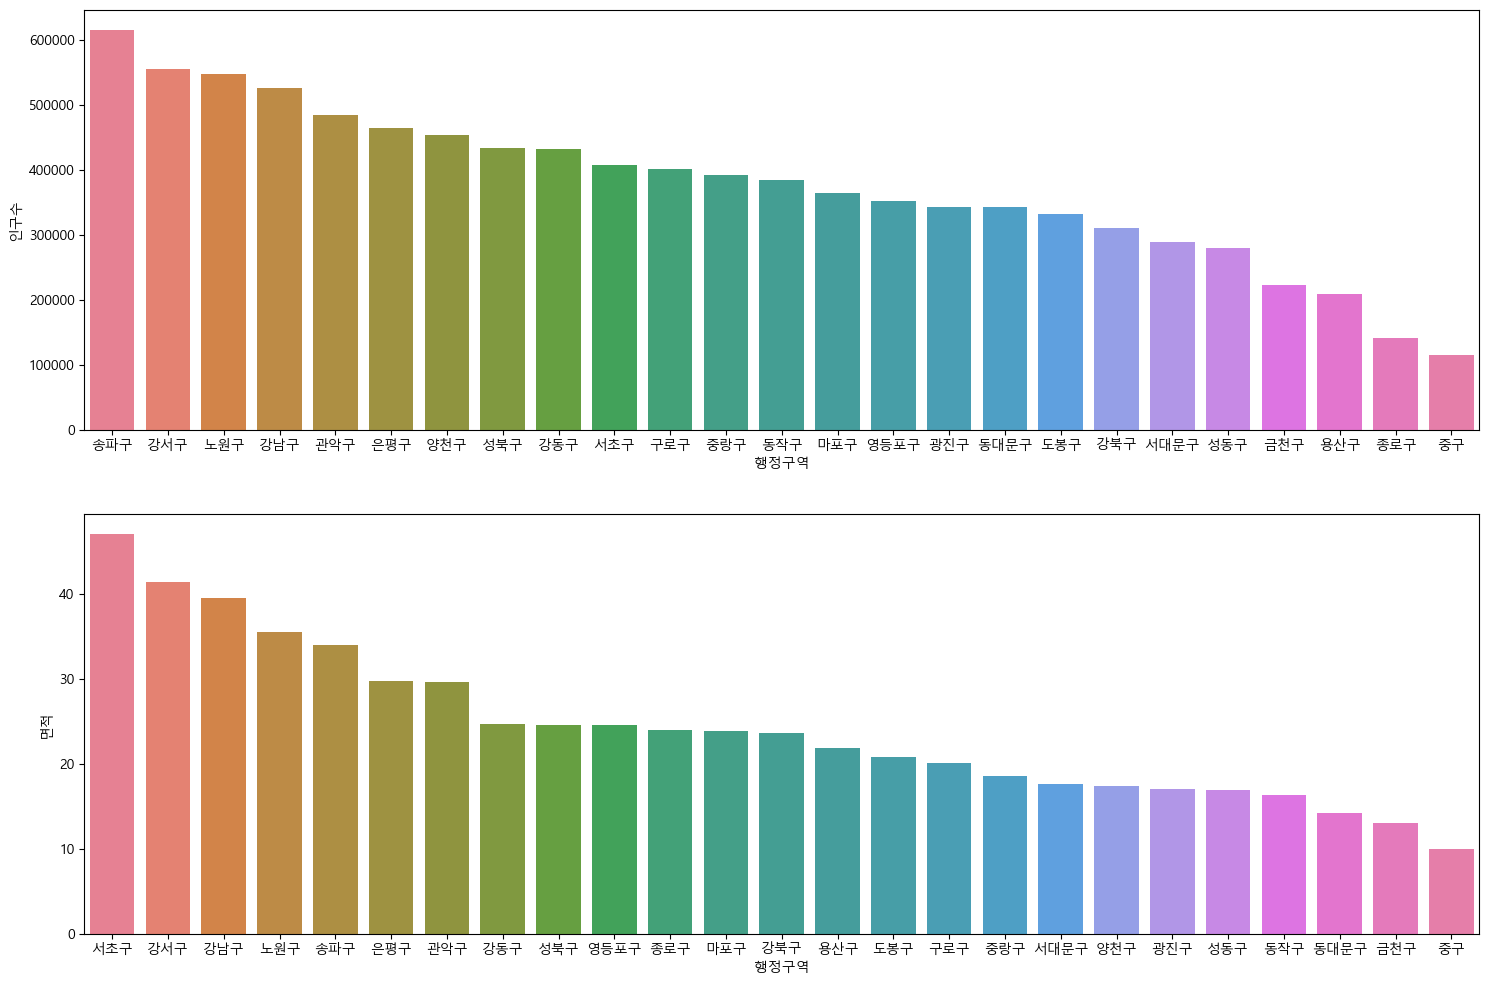

In [78]:
# subplots() 함수를 사용하여 axes 객체를 생성하기
figure,(axes1,axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)
print(figure)
print(axes1)
print(axes2)

# seaborn의 barplot() 함수 호출하기 - 행정구역과 인구수
sns.barplot(data=seoul_df.sort_values(by='인구수', ascending=False), x='행정구역', y='인구수', ax=axes1, hue='행정구역')
# seaborn의 barplot() 함수 호출하기 - 행정구역과 면적
sns.barplot(data=seoul_df.sort_values(by='면적', ascending=False), x='행정구역', y='면적', ax=axes2, hue='행정구역')
plt.show()

In [81]:
# 광역시도 이름을 인자로 받아서 인구수와 면적을 그려주는 함수
def show_pop_area(sido_name):
    # 입력받은 광역시도에 해당하는 DataFrame 객체생성
    sido_df = data.loc[data['광역시도'] == sido_name].copy()
    # Figure와 Axes 객체 생성
    figure, (axes1,axes2) = plt.subplots(nrows=2, ncols=1)
    # Figure size 확대
    figure.set_size_inches(18,12)
    
    pop_plot = sns.barplot(x='행정구역', y='인구수', data=sido_df.sort_values(by='인구수',ascending=False), ax=axes1,hue='행정구역')
    pop_plot.set_title(f'{sido_name} 행정구역별 인구수')

    area_plot = sns.barplot(x='행정구역', y='면적', data=sido_df.sort_values(by='면적',ascending=False), ax=axes2,hue='행정구역')
    area_plot.set_title(f'{sido_name} 행정구역별 면적')
    
    plt.show()   

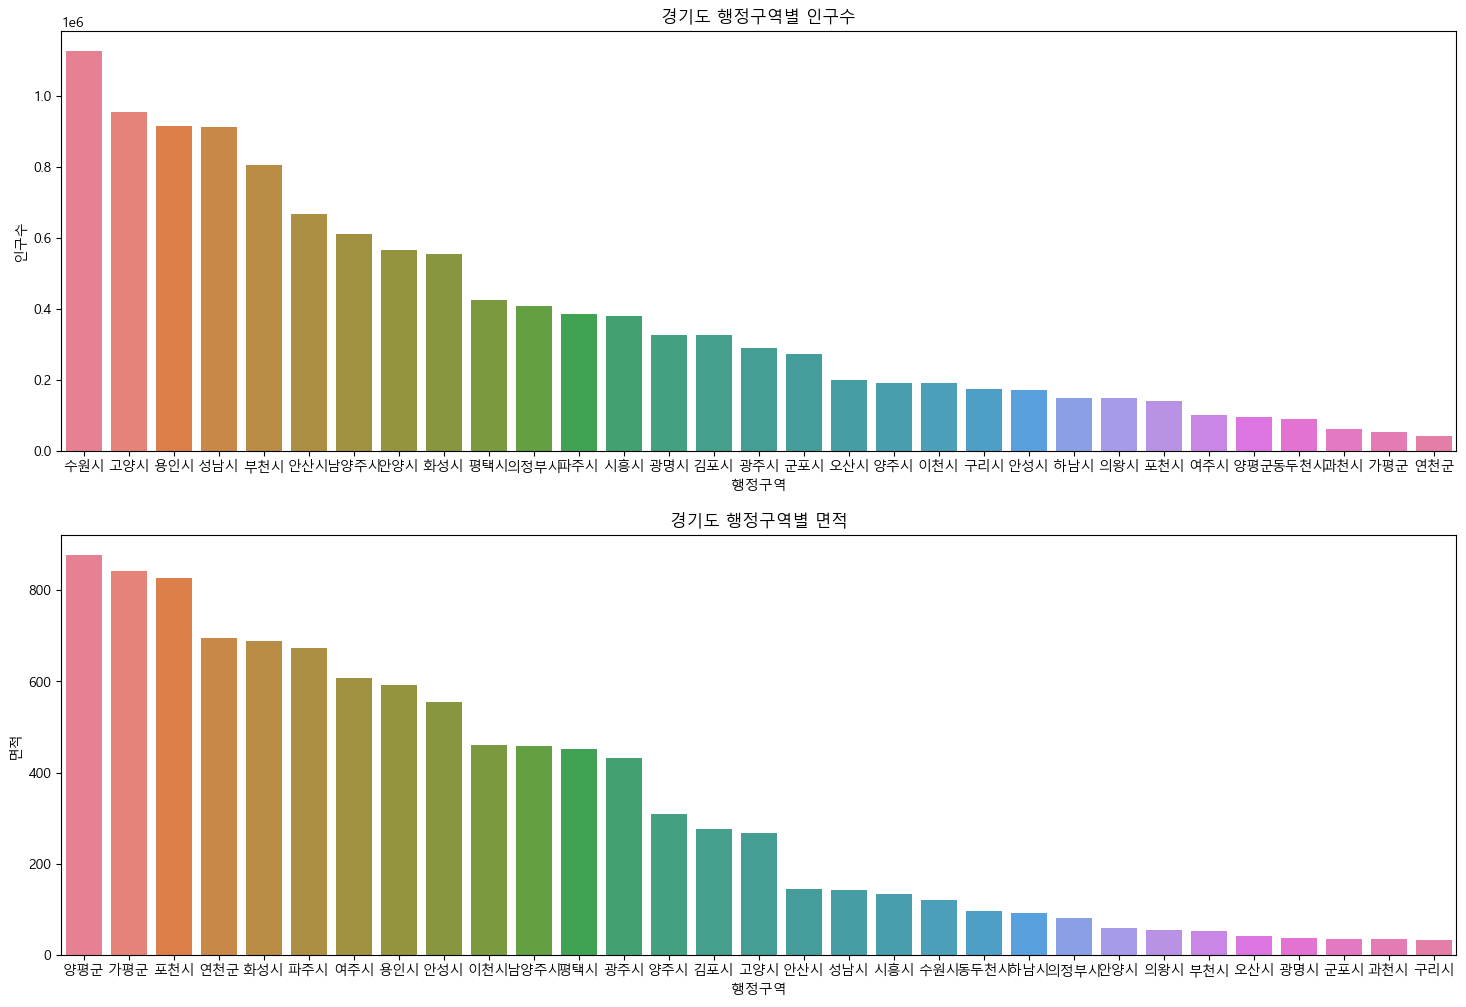

In [82]:
show_pop_area('경기도')

In [ ]:
# 전국데이터의 광역시도의 인구수 
# Figure와 Axes 객체 생성
figure,axes1 = plt.subplots(nrows=1, ncols=1)
# Figure size 확대
figure.set_size_inches(18,12)

sns.barplot(data=data, x='광역시도', y='인구수', ax=axes1, hue='광역시도')

In [ ]:
# figure, ax1 = plt.subplots(nrows=1, ncols=1)
# figure.set_size_inches(18,12)
# sns.barplot(data=seoul_df, x="행정구역", y="인구수", ax=ax1,hue='행정구역')

#y축의 label값에 ,(콤마) 출력하기
# ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


# for item in ax1.get_xticklabels(): 
#     item.set_rotation(90)
# for i, v in enumerate(seoul_df["인구수"].items()):
#     ax1.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
# plt.tight_layout()